In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest')
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 400 images belonging to 2 classes.


In [3]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Test',
                                            target_size = (100, 100),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 200 images belonging to 2 classes.


In [4]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

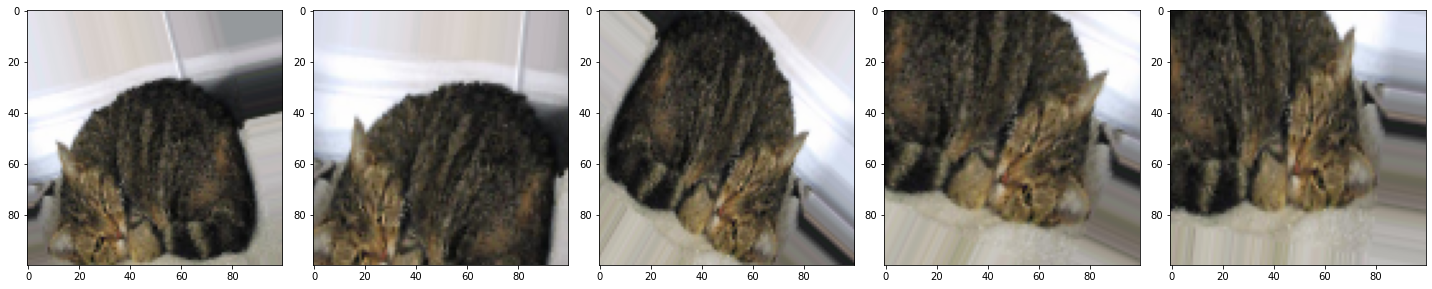

In [5]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [7]:
CDC_model = Sequential()

CDC_model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
CDC_model.add(MaxPooling2D((2,2)))

CDC_model.add(Conv2D(32, (3,3), activation = 'relu'))
CDC_model.add(MaxPooling2D((2,2)))

CDC_model.add(Flatten())
CDC_model.add(Dense(64, activation = 'relu'))
CDC_model.add(Dense(1, activation = 'sigmoid'))

In [8]:
CDC_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
history = CDC_model.fit(training_set,validation_data = test_set ,epochs = 50, batch_size = 64)

Epoch 1/50
13/13 [==============================] - 7s 517ms/step - loss: 0.7360 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/50
13/13 [==============================] - 6s 468ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/50
13/13 [==============================] - 6s 479ms/step - loss: 0.6930 - accuracy: 0.4975 - val_loss: 0.6907 - val_accuracy: 0.5100
Epoch 4/50
13/13 [==============================] - 6s 462ms/step - loss: 0.6878 - accuracy: 0.5600 - val_loss: 0.6895 - val_accuracy: 0.5050
Epoch 5/50
13/13 [==============================] - 6s 468ms/step - loss: 0.6825 - accuracy: 0.5800 - val_loss: 0.6852 - val_accuracy: 0.5350
Epoch 6/50
13/13 [==============================] - 6s 469ms/step - loss: 0.6737 - accuracy: 0.6050 - val_loss: 0.7112 - val_accuracy: 0.5050
Epoch 7/50
13/13 [==============================] - 6s 470ms/step - loss: 0.6692 - accuracy: 0.5850 - val_loss: 0.6868 - val_accuracy: 0.5250
Epoch 

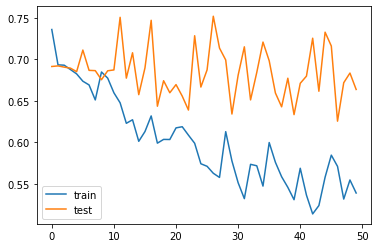

In [10]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

In [11]:
CDC_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [12]:
from tensorflow.keras.models import load_model
CDC_model.save('model.h5')

In [14]:
from tensorflow.keras.models import load_model
#load model
model = load_model('model.h5')

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('F:\\DCCC\\Test\\Dog\\232.jpg', target_size = (100,100))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = CDC_model.predict(test_image)
result

array([[0.6353351]], dtype=float32)

The image classified is dog


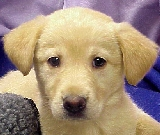

In [26]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")
from IPython.display import Image
Image(filename = 'F:\\DCCC\\Test\\Dog\\232.jpg',height='200',width='200')